## Cosine Similarity Calculations
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Similarity measures have a multiude of uses in machine learning projects; they come in handy when matching strings, measuring distance, and extracting features. This similarity measurement is particularly concerned with orientation, rather than magnitude. 
In this case study, you'll use the cosine similarity to compare both a numeric data within a plane and a text dataset for string matching.

Load the Python modules, including cosine_similarity, from sklearn.metrics.pairwise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

**<font color='teal'> Load the distance dataset into a dataframe. </font>**

In [3]:
df=pd.read_csv('distance_dataset.csv')
df.head()

Unnamed: 0         X         Y         Z  ClusterID
0           0  5.135779  4.167542  5.787635          4
1           1  4.280721  5.770909  6.091044          4
2           2  8.329098  7.540436  3.247239          2
3           3  5.470224  5.069249  5.768313          4
4           4  2.381797  2.402374  3.879101          1

### Cosine Similarity with clusters and numeric matrices

All points in our dataset can be thought of as feature vectors. We illustrate it here as we display the __Cosine Similarity__ between each feature vector in the YZ plane and the [5, 5] vector we chose as reference. The sklearn.metrics.pairwise module provides an efficient way to compute the __cosine_similarity__ for large arrays from which we can compute the similarity.

 **<font color='teal'> First, create a 2D and a 3D matrix from the dataframe. The 2D matrix should contain the 'Y' and 'Z' columns and the 3D matrix should contain the 'X','Y', and 'Z' columns.</font>**

In [12]:
matYZ=df.loc[:,['Y','Z']]
mat=df.loc[:,['X','Y','Z']]

Calculate the cosine similarity for those matrices with reference planes of 5,5 and 5,5,5. Then subtract those measures from 1 in new features.

In [13]:
simCosine3D = 1. - cosine_similarity(mat, [[5,5,5]], 'cosine')
simCosine = 1. - cosine_similarity(matYZ, [[5,5]], 'cosine')

Using the 2D matrix and the reference plane of (5,5) we can use a scatter plot to view the way the similarity is calculated using the Cosine angle.

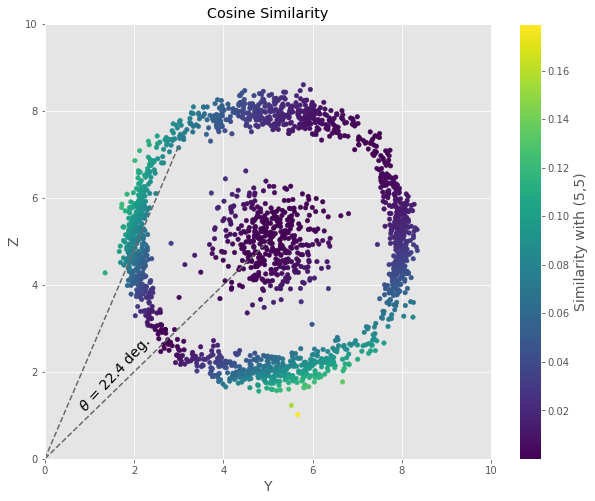

In [14]:
figCosine = plt.figure(figsize=[10,8])

plt.scatter(df.Y, df.Z, c=simCosine[:,0], s=20)
plt.plot([0,5],[0,5], '--', color='dimgray')
plt.plot([0,3],[0,7.2], '--', color='dimgray')
plt.text(0.7,2.6,r'$\theta$ = 22.4 deg.', rotation=47, size=14)
plt.ylim([0,10])
plt.xlim([0,10])
plt.xlabel('Y', size=14)
plt.ylabel('Z', size=14)
plt.title('Cosine Similarity')
cb = plt.colorbar()
cb.set_label('Similarity with (5,5)', size=14)

#figCosine.savefig('similarity-cosine.png')

Now, plot the 3D matrix with the similarity and the reference plane, (5,5,5).

TypeError: '(slice(None, None, None), 0)' is an invalid key

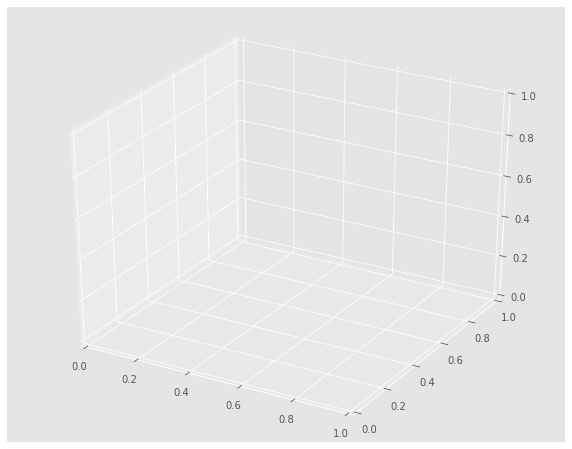

In [32]:
from mpl_toolkits.mplot3d import Axes3D
figCosine3D = plt.figure(figsize=(10, 8))
ax = figCosine3D.add_subplot(111, projection='3d')

p = ax.scatter(mat[:,0], mat[:,1], mat[:,2], c=simCosine3D[:,0])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
cb = figCosine3D.colorbar(p)
cb.set_label('Similarity with (5,5,5)', size=14)
                                   
figCosine3D.tight_layout()
#figCosine3D.savefig('cosine-3D.png', dpi=300, transparent=True)

----

### Cosine Similarity with text data
This is a quick example of how you can use Cosine Similarity to compare different text values or names for record matching or other natural language proecessing needs. 
First, we use count vectorizer to create a vector for each unique word in our Document 0 and Document 1. 

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
Document1 = "Starbucks Coffee"
Document2 = "Essence of Coffee"

corpus = [Document1,Document2]

X_train_counts = count_vect.fit_transform(corpus)

pd.DataFrame(X_train_counts.toarray(),columns=count_vect.get_feature_names(),index=['Document 0','Document 1'])

coffee  essence  of  starbucks
Document 0       1        0   0          1
Document 1       1        1   1          0

Now, we use a common frequency tool called TF-IDF to convert the vectors to unique measures.

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['Document 0','Document 1'])

coffee   essence        of  starbucks
Document 0  0.579739  0.000000  0.000000   0.814802
Document 1  0.449436  0.631667  0.631667   0.000000

Here, we finally apply the __Cosine Similarity__ measure to calculate how similar Document 0 is compared to any other document in the corpus. Therefore, the first value of 1 is showing that the Document 0 is 100% similar to Document 0 and 0.26055576 is the similarity measure between Document 0 and Document 1.

In [35]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.26055567]])

Replace the current values for `Document 0` and `Document 1` with your own sentence or paragraph and apply the same steps as we did in the above example.

 **<font color='teal'> Combine the documents into a corpus.</font>**

In [26]:
Document1 = "Robert John Downey Jr. (born April 4, 1965)[1] is an American actor, producer, and singer. His career has been characterized by critical and popular success in his youth, followed by a period of substance abuse and legal troubles, before a resurgence of commercial success in middle age. In 2008, Downey was named by Time magazine among the 100 most influential people in the world,[2][3] and from 2013 to 2015, he was listed by Forbes as Hollywood's highest-paid actor.[2][4] His films have grossed over $14.4 billion worldwide,[5] making him the second highest-grossing box-office star of all time.[6] At the age of five, he made his acting debut in Robert Downey Sr.'s film Pound in 1970. He subsequently worked with the Brat Pack in the teen films Weird Science (1985) and Less Than Zero (1987). In 1992, Downey portrayed the title character in the biopic Chaplin, for which he was nominated for the Academy Award for Best Actor and won a BAFTA Award. Following a stint at the Corcoran Substance Abuse Treatment Facility on drug charges, he joined the TV series Ally McBeal, for which he won a Golden Globe Award; however in the wake of two drug charges, one in late 2000 and one in early 2001, he was fired and his character terminated. He stayed in a court-ordered drug treatment program shortly after and has maintained his sobriety since 2003. Initially, bond completion companies would not insure Downey, until Mel Gibson paid the insurance bond for the 2003 film The Singing Detective.[7] He subsequently went on to star in the black comedy Kiss Kiss Bang Bang (2005), the thriller Zodiac (2007), and the action comedy Tropic Thunder (2008); for the latter he was nominated for an Academy Award for Best Supporting Actor. Downey gained global recognition for starring as Tony Stark / Iron Man in ten films within the Marvel Cinematic Universe, beginning with Iron Man (2008). He has also played the title character in Guy Ritchie's Sherlock Holmes (2009), which earned him his second Golden Globe, and its sequel (2011)."

Document2 = "Iron Man is a fictional superhero appearing in American comic books published by Marvel Comics. The character was co-created by writer and editor Stan Lee, developed by scripter Larry Lieber, and designed by artists Don Heck and Jack Kirby. The character made his first appearance in Tales of Suspense #39 (cover dated March 1963), and received his own title in Iron Man #1 (May 1968). A wealthy American business magnate, playboy, and ingenious scientist, Anthony Edward Tony Stark suffers a severe chest injury during a kidnapping. When his captors attempt to force him to build a weapon of mass destruction, he instead creates a mechanized suit of armor to save his life and escape captivity. Later, Stark develops his suit, adding weapons and other technological devices he designed through his company, Stark Industries. He uses the suit and successive versions to protect the world as Iron Man. Although at first concealing his true identity, Stark eventually publicly reveals himself to be Iron Man. Initially, Iron Man was a vehicle for Stan Lee to explore Cold War themes, particularly the role of American technology and industry in the fight against communism. Subsequent re-imaginings of Iron Man have transitioned from Cold War motifs to contemporary matters of the time.[1] Throughout most of the character's publication history, Iron Man has been a founding member of the superhero team the Avengers and has been featured in several incarnations of his own various comic book series. Iron Man has been adapted for several animated TV shows and films. The Marvel Cinematic Universe character was portrayed by Robert Downey Jr. in the Marvel Cinematic Universe films Iron Man (2008), The Incredible Hulk (2008) in a cameo, Iron Man 2 (2010), The Avengers (2012), Iron Man 3 (2013), Avengers: Age of Ultron (2015), Captain America: Civil War (2016), Spider-Man: Homecoming (2017), Avengers: Infinity War (2018), Avengers: Endgame (2019), Spider-Man: Far From Home (2019) in archive footage, and will reprise his role in Black Widow (2020)."

Document3="Anthony Edward Stark is a fictional character portrayed by Robert Downey Jr. in the Marvel Cinematic Universe (MCU) film franchise—based on the Marvel Comics character of the same name—commonly known by his alter ego, Iron Man. In the films, Stark is an industrialist, genius inventor, hero and former playboy who is CEO of Stark Industries. At the beginning of the series, he is a chief weapons manufacturer for the U.S. military, until he has a change of heart and redirects his technical knowledge into the creation of mechanized suits of armor which he uses to defend against those that would threaten peace around the world.Stark has been one of the central figures of the MCU, having appeared in eleven films since his introduction in Iron Man (2008). The character and Downey's performance have been credited with helping to cement the MCU as a multi-billion dollar franchise, with Stark's evolution often being considered the defining arc of the series."
corpus = [Document1,Document2,Document3]

 **<font color='teal'> Apply the count vectorizer to the corpus to transform it into vectors.</font>**

In [27]:
X_train_counts = count_vect.fit_transform(corpus)

 **<font color='teal'> Convert the vector counts to a dataframe with Pandas.</font>**

In [28]:
pd.DataFrame(X_train_counts.toarray(),columns=count_vect.get_feature_names(),index=['RDJ','IRON MAN','TONY'])

100  14  1963  1965  1968  1970  1985  1987  1992  2000  ...  \
RDJ         1   1     0     1     0     1     1     1     1     1  ...   
IRON MAN    0   0     1     0     1     0     0     0     0     0  ...   
TONY        0   0     0     0     0     0     0     0     0     0  ...   

          within  won  worked  world  worldwide  would  writer  youth  zero  \
RDJ            1    2       1      1          1      1       0      1     1   
IRON MAN       0    0       0      1          0      0       1      0     0   
TONY           0    0       0      1          0      1       0      0     0   

          zodiac  
RDJ            1  
IRON MAN       0  
TONY           0  

[3 rows x 398 columns]

 **<font color='teal'> Apply TF-IDF to convert the vectors to unique frequency measures.</font>**

In [29]:
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['RDJ','IRON MAN','TONY'])

100        14     1963      1965     1968      1970      1985  \
RDJ       0.037354  0.037354  0.00000  0.037354  0.00000  0.037354  0.037354   
IRON MAN  0.000000  0.000000  0.04022  0.000000  0.04022  0.000000  0.000000   
TONY      0.000000  0.000000  0.00000  0.000000  0.00000  0.000000  0.000000   

              1987      1992      2000  ...    within       won    worked  \
RDJ       0.037354  0.037354  0.037354  ...  0.037354  0.074708  0.037354   
IRON MAN  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
TONY      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

             world  worldwide     would   writer     youth      zero    zodiac  
RDJ       0.022062   0.037354  0.028409  0.00000  0.037354  0.037354  0.037354  
IRON MAN  0.023755   0.000000  0.000000  0.04022  0.000000  0.000000  0.000000  
TONY      0.038657   0.000000  0.049778  0.00000  0.000000  0.000000  0.000000  

[3 rows x 398 columns]

 **<font color='teal'> Use the cosine similarity function to get measures of similarity for the sentences or paragraphs in your original document.</font>**

In [30]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.49298754, 0.54254208]])

In [ ]:
# emplyes docuemnt RDJ is more similar to TONY over IRON MAN